# Auxiliar 10 - Preparación Tarea 2

Imagine que está trabajando en una importante empresa dedicada al ensamblaje y venta de dispositivos tecnológicos. Y se le encomendó dar respuesta a la siguiente pregunta de investigación: **¿Qué características y especificaciones definen el precio de una laptop?**. Para resolver este problema cuenta datos de una muestra de más de $800$ computadores personales en el mercado indio contenidos en el archivo $laptop\_price.csv$.


Antes de realizar el análisis, cargamos las librerías importantes.

In [32]:
# Paquetes para tratamiento de datos
import pandas as pd
import numpy as np
from itertools import product

# Librerías gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Paquetes estadísticos
import scipy.stats as ss
from scipy.stats import norm, lognorm, kstest, ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

Cargamos los datos.

In [33]:
data = pd.read_csv("laptop_price.csv")
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,No warranty,No,No,26990,3 stars,0,0


Comenzamos con el análisis exploratorio.

In [34]:
# Información general del set de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  warranty           823 non-null    object
 12  Touchscreen        823 non-null    object
 13  msoffice           823 non-null    object
 14  Price              823 non-null    int64 
 15  rating             823 non-null    object
 16  Number of Ratings  823 non-null    int64 
 1

In [35]:
# Revisamos si hay datos nulos
data.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [36]:
# Estadística descriptiva de los atributos numéricos
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [37]:
pd.set_option("display.max_rows", 100)

cat_cols = data.select_dtypes(include=object).columns.tolist()
pd.DataFrame(
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

count
column          value               
Touchscreen     Yes               97
                No               726
brand           Avita             14
                APPLE             28
                MSI               50
                acer              51
                HP               136
                Lenovo           144
                DELL             151
                ASUS             249
graphic_card_gb 8 GB              14
                6 GB              37
                2 GB              67
                4 GB             128
                0 GB             577
hdd             2048 GB            1
                512 GB            41
                1024 GB          160
                0 GB             621
msoffice        Yes              281
                No               542
os              DOS               16
                Mac               28
                Windows          779
os_bit          32-bit           109
                64-bit           714
processor_brand M1                24
                AMD              189
                Intel            610
processor_gnrtn 4th                1
                12th               3
                9th                6
                7th                9
                8th               41
                10th             204
                Not Available    225
                11th             334
processor_name  Core i9            8
                Pentium Quad      13
                Celeron Dual      24
                M1                24
                Ryzen 3           26
                Ryzen 9           26
                Ryzen 7           56
                Ryzen 5           82
                Core i7          110
                Core i3          164
                Core i5          290
ram_gb          32 GB              2
                16 GB            177
                4 GB             226
                8 GB             418
ram_type        DDR3               7
                DDR5               8
                LPDDR3            14
                LPDDR4            27
                LPDDR4X           58
                DDR4             709
rating          1 star             2
                2 stars            9
                5 stars           16
                3 stars          352
                4 stars          444
ssd             3072 GB            1
                2048 GB            2
                128 GB             3
                1024 GB          111
                0 GB             124
                256 GB           184
                512 GB           398
warranty        3 years           13
                2 years           23
                No warranty      278
                1 year           509

Para ver si un par de variables categóricas se correlacionan, se puede ejecutar un test de hipótesis Chi cuadrado cuyas hipótesis son:

$$
\begin{align*}
H_0 &: \text{Las variables categóricas A y B no se correlacionan} \\
H_A &: \sim
\end{align*}
$$

In [38]:
## Creating a DataFrame with all categorical variables
df_cat = pd.DataFrame(data = data.dtypes, columns = ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])

df_cat = data[cat_var]

## Let us split this list into two parts
cat_var1 = ('brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 
            'graphic_card_gb', 'warranty', 'Touchscreen', 'msoffice', 'rating')

cat_var2 = ('brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 
            'graphic_card_gb', 'warranty', 'Touchscreen', 'msoffice', 'rating')

## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))
result

[('brand', 'processor_brand', 1.0271550838751217e-144),
 ('brand', 'processor_name', 4.467314771852374e-146),
 ('brand', 'processor_gnrtn', 9.02526331510535e-47),
 ('brand', 'ram_gb', 5.963330106555889e-09),
 ('brand', 'ram_type', 2.0928073385558767e-09),
 ('brand', 'ssd', 2.8212345253634296e-09),
 ('brand', 'hdd', 5.2455867871530904e-08),
 ('brand', 'os', 2.4436350383484196e-175),
 ('brand', 'os_bit', 0.0323002884671934),
 ('brand', 'graphic_card_gb', 1.9908239538922718e-14),
 ('brand', 'warranty', 2.3434292444009845e-38),
 ('brand', 'Touchscreen', 0.004298233685772673),
 ('brand', 'msoffice', 3.164274969071167e-28),
 ('brand', 'rating', 1.1102622057490958e-05),
 ('processor_brand', 'brand', 1.0271550838751217e-144),
 ('processor_brand', 'processor_name', 0.0),
 ('processor_brand', 'processor_gnrtn', 1.3533038900020305e-136),
 ('processor_brand', 'ram_gb', 1.774306285066094e-22),
 ('processor_brand', 'ram_type', 0.01026790778507657),
 ('processor_brand', 'ssd', 1.7324203941725554e-06)

In [39]:
chi_test_output = pd.DataFrame(result, columns = ['Var1', 'Var2', 'Coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='Var1', columns='Var2', values='Coeff')

Var2,Touchscreen,brand,graphic_card_gb,hdd,msoffice,os,os_bit,processor_brand,processor_gnrtn,processor_name,ram_gb,ram_type,rating,ssd,warranty
Var1,,,,,,,,,,,,,,,
Touchscreen,NaN,4.298234e-03,5.843310e-02,9.554342e-07,3.354506e-07,4.480575e-02,1.912519e-02,1.861460e-01,1.906570e-03,5.867425e-03,2.995423e-01,1.738201e-21,5.283795e-01,2.286075e-07,2.062224e-10
brand,4.298234e-03,NaN,1.990824e-14,5.245587e-08,3.164275e-28,2.443635e-175,3.230029e-02,1.027155e-144,9.025263e-47,4.467315e-146,5.963330e-09,2.092807e-09,1.110262e-05,2.821235e-09,2.343429e-38
graphic_card_gb,5.843310e-02,1.990824e-14,NaN,8.659712e-04,1.067081e-04,2.973293e-07,4.115771e-03,6.758857e-08,2.071475e-15,1.092861e-58,1.452863e-22,1.186653e-04,6.494483e-01,2.878706e-32,4.528691e-02
hdd,9.554342e-07,5.245587e-08,8.659712e-04,NaN,3.716778e-06,1.414526e-57,1.757806e-30,8.498033e-04,8.816708e-09,3.227585e-53,5.920414e-06,1.912266e-84,1.493465e-01,1.678542e-121,2.680881e-12
msoffice,3.354506e-07,3.164275e-28,1.067081e-04,3.716778e-06,NaN,5.843738e-06,7.036346e-06,1.200989e-03,1.335693e-04,2.291037e-05,4.862260e-01,5.715985e-03,2.902141e-07,4.256298e-06,4.524239e-47
os,4.480575e-02,2.443635e-175,2.973293e-07,1.414526e-57,5.843738e-06,NaN,1.862390e-21,2.960341e-151,1.434174e-21,3.021885e-140,4.655309e-07,2.806288e-73,4.535166e-08,1.461492e-13,1.088386e-06
os_bit,1.912519e-02,3.230029e-02,4.115771e-03,1.757806e-30,7.036346e-06,1.862390e-21,NaN,7.600005e-02,2.929610e-02,1.739020e-04,1.453262e-03,2.440125e-28,8.558824e-03,1.192440e-18,2.831409e-19
processor_brand,1.861460e-01,1.027155e-144,6.758857e-08,8.498033e-04,1.200989e-03,2.960341e-151,7.600005e-02,NaN,1.353304e-136,0.000000e+00,1.774306e-22,1.026791e-02,2.018788e-03,1.732420e-06,6.711638e-05
processor_gnrtn,1.906570e-03,9.025263e-47,2.071475e-15,8.816708e-09,1.335693e-04,1.434174e-21,2.929610e-02,1.353304e-136,NaN,7.819798e-154,8.603250e-31,9.452683e-65,4.451746e-01,1.810785e-11,3.020336e-03


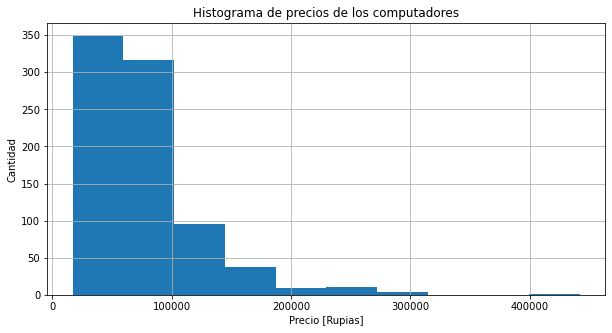

In [40]:
# Histograma del precio
chart = data["Price"].hist(figsize=(10, 5))
chart.set_title("Histograma de precios de los computadores")
chart.set_xlabel("Precio [Rupias]")
chart.set_ylabel("Cantidad")
plt.show()

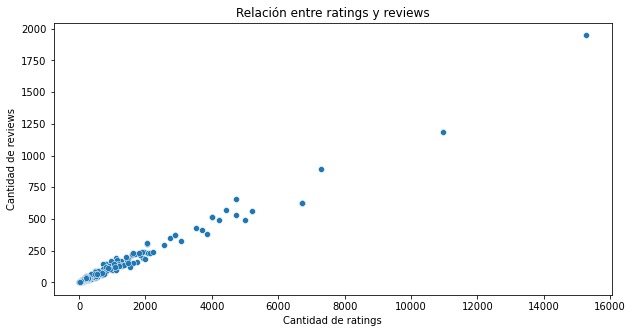

In [41]:
# Numero de ratings y numero de reviews
plt.figure(figsize=(10, 5))
chart = sns.scatterplot(data=data, x="Number of Ratings", y="Number of Reviews")
chart.set_title("Relación entre ratings y reviews")
chart.set_xlabel("Cantidad de ratings")
chart.set_ylabel("Cantidad de reviews")
plt.show()

In [42]:
px.histogram(data, x="Price", color="brand", barmode="overlay",
             title='Histograma  del precio por marca del computador',
             labels={'Price':'Precio', 'count': 'Cantidad'})

## Parte 1
Plantee un modelo que tome como variable explicativa a $processor\_name$ y otras 4 variables independientes más. Luego, ejecútelo computacionalmente e interprete los resultados.

Como el precio tiene una distribución un tanto asimétrica, podríamos aplicar una transformación logaritmica a esta variable.

In [43]:
data["log_Price"] = data["Price"].apply(lambda x: np.log(x))

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.dropna(how='all', inplace=True)

$$ ln(Price) = \beta_0 + \beta_1 processor\_name + \beta_2 ram\_gb + \beta_3 os + \beta_4 Touchscreen + \beta_5 rating + \varepsilon$$

In [44]:
model0 = smf.ols(formula='log_Price ~ processor_name + ram_gb + os + Touchscreen + rating', data=data)

results = model0.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     162.0
Date:                Mon, 29 May 2023   Prob (F-statistic):          2.63e-265
Time:                        21:39:24   Log-Likelihood:                 81.455
No. Observations:                 823   AIC:                            -120.9
Df Residuals:                     802   BIC:                            -21.94
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Tenemos un $R^2$ cercano a 0.802, es decir, un 80.2% de la variabilidad del modelo está siendo capturada por las variables explicativas consideradas.

En cuanto al análisis e interpretación de cada variable, se puede mencionar lo siguiente:

* $processor_name$: Todos los procesadores del tipo Core, Ryzen y M1 tienen una diferencia estadísticamente significativa con respecto al procesador Celerum Dual. Solo el valor Pentium Quad no es significativo con respecto al valor base. Además, todos los procesadores representan un aumento en el precio con respecto al precio que tiene el procesador Celerum Dual.

* $ram\_gb$: El valor base en esta categoría son 16 GB. Y todos los coeficientes son significativos salvo la categoría asociada a los 32 GB. Y se tiene que una laptop con memoria ram menor a los 16 GB, tienen un precio menor con respecto al valor base. Y que si el notebook tiene 32 GB, el precio será mayor al que tiene una laptop de 16 GB. O sea, existe una relación positiva entre cantidad de GB y precio del computador.

* $os$: El valor base de esta categoría es DOS. Donde todos los coeficientes son significativos. Y los computadores MAC tienen precios mayores con respecto a los de sistema operativo DOS, mientras que los computadores Windows tienene precios menores con respecto a la categoría base.

* $Touchscreen$: El valor base de esta categoría es No, o sea, las laptop que no tienen una pantalla táctil. Y se tiene que el que un computador tenga este tipo de pantalla, representa un efecto positivo y significativo sobre el precio del computador.

* $rating$: El valor base de esta categoría es 1, es decir, la calificación mínima. Y se tiene que ningún coeficiente es significativo en esta variable. El valor 2 y 4 tienen precios menores que los notebooks de valor 1. Mientras que los computadores de rating 3 y 5 tienen mayores precios con respecto a 1.

(Propuesto): Interpretar cada uno de los coeficientes Log-Level.

## Parte 2
Genere un nuevo modelo que recoja las mismas variables que el modelo anterior, pero que sume la variable $processor\_brand$. ¿Qué problemas puede causar esto en términos de la calidad del modelo? ¿El nuevo modelo resulta realmente ser peor que el anterior?

$$ Price = \beta_0 + \beta_1 processor\_name + \beta_2 ram\_gb + \beta_3 os + \beta_4 Touchscreen + \beta_5 rating + \beta_6 processor\_brand + \varepsilon$$

In [45]:
model1 = smf.ols(formula="log_Price ~ processor_brand + processor_name + ram_gb + os + Touchscreen + rating", data=data)

results = model1.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.1
Date:                Mon, 29 May 2023   Prob (F-statistic):          3.40e-264
Time:                        21:39:25   Log-Likelihood:                 81.455
No. Observations:                 823   AIC:                            -118.9
Df Residuals:                     801   BIC:                            -15.22
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [46]:
model_1 = smf.ols(formula='log_Price ~ processor_name + ram_gb + os + Touchscreen + rating', data=data).fit()
model_2 = smf.ols(formula='log_Price ~ processor_brand + processor_name + ram_gb + os + Touchscreen + rating', data=data).fit()

print(summary_col([model_1,model_2], float_format="%.5f", model_names=["Ec. Mincer", "Ec. Mincer Modificada"], stars=True))


                                Ec. Mincer Ec. Mincer Modificada
----------------------------------------------------------------
Intercept                      10.55742*** 10.55607***          
                               (0.16981)   (0.28035)            
R-squared                      0.80154     0.80154              
R-squared Adj.                 0.79659     0.79634              
Touchscreen[T.Yes]             0.24558***  0.24559***           
                               (0.02446)   (0.02448)            
os[T.Mac]                      0.42298***  0.42298***           
                               (0.12538)   (0.12546)            
os[T.Windows]                  -0.50318*** -0.50318***          
                               (0.05787)   (0.05791)            
processor_brand[T.Intel]                   0.00136              
                                           (0.22452)            
processor_brand[T.M1]                      0.39595***           
                        

El problema que puede ocurrir con este modelo es la multicolinealidad. Porque los nombres de cada procesador son propios de una marca. Por lo tanto, habrá una correlación muy alta entre marcas y nombre del procesador.

Si observamos los resultados del modelo, podemos notar que el $R^2$ mantienen sus valores. Así mismo pasa con la log-verosimilitud, mientras AIC y BIC aumentan a causa de la adición de nuevos coeficientes.

Por otro lado, podemos ver que algunos de los errores estándar de los coeficientes asociados a nombres de los procesadores aumentan, dada la multicolinealidad. Pero esto solo provoca una pérdida de un grado de significancia en el procesador Ryzen 3. Por otro lado, una de las categorías de marca resulta ser significativa.

Al final, debido a que el modelo en términos de métricas generales no parece mejorar, pero se tiene información significativa con respecto a la marca M1 y AMD, decidir cuál es el mejor modelo dependerá de qué tan agregado queremos hacer el análisis, ya que si queremos tomar en cuenta la marca,puede que sea una buena idea mantener el segundo modelo. Pero si se prefiere un análisis más desagregado focalizandose en los nombres del procesador, a sabiendas de que un nombre corresponde a solo una marca, cualquier modelo podría ser bueno para estos fines.

## Parte 3
Evalúe la calidad del modelo en torno a los supuestos MCO.

### 1. Linealidad de los parámetros

Esto se cumple por la definición del modelo.

### 2. No dependencia lineal entre variables explicativas

Por el conocimiento que tenemos de las variables y dado que las regresiones no se indefinen, sabemos que no existe dependencia lineal entre variables independientes. Por lo tanto, los coeficientes pueden ser estimados por minimización de cuadrados ordinarios.

### 3. Muestras aleatorias

De acuerdo al análisis exploratorio, se puede concluir que existe gran variedad de registros. Por lo tanto, en cierta medida, se cumple este supuesto.

### 4. Exogeneidad

Para saber si ocurre endogeneidad, hay que hacerse la clásica pregunta: ¿Las variables explicativas están correlacionadas a algún factor que no estoy observando?

Un caso podría ser que todas las especificaciones estén relacionadas con el propósito que busca satisfacer el computador. Ya que suele pasar que cuando vamos a una tienda a cotizar un computador, el o la vendedora que nos atiende nos pregunta: ¿Qué uso le darás al computador? Ya que hay dispositivos específicos para el gaming, el trabajo de oficina, el diseño gráfico y la creación de contenido, entre otros. Y cada propósito significará distintos tipos de especificaciones técnicas para el computador. De esta manera, por ejemplo, el tipo de tarjeta gráfica variará según si el uso es gaming o casual.

### 5. Homocedasticidad

La homoedasticidad se cumple si es que los residuos tienen igual varianza para todos los valores predichos.

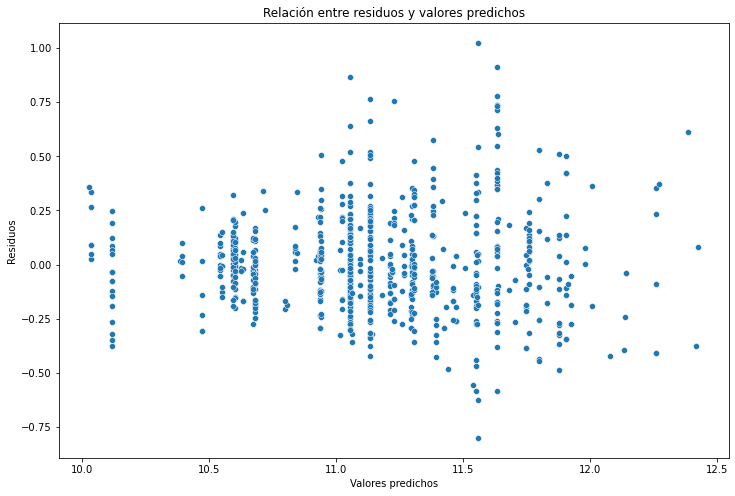

In [47]:
# obtenemos los valores predichos y residuos del modelo
predicted_values = model_1.predict()
residual_values = model_1.resid

# Residuos en función de los valores predichos
plt.figure(figsize=(12, 8))
chart = sns.scatterplot(x=predicted_values, y=residual_values)
chart.set_title("Relación entre residuos y valores predichos")
chart.set_xlabel("Valores predichos")
chart.set_ylabel("Residuos")
plt.show()

Vemos que la varianza de los residuos aumenta con el precio. Por lo tanto, no se cumple el supuesto de hoocedastiidad por presencia de heterocedasticidad.

Pero para tener más seguridad, comprobémoslo con un test de hipótesis. Un test de hipótesis que sirve para saber si el modelo presenta heterocedasticidad es el llamado Test de Breuch Pagan, cuya formulación es:

$$H_0: \text{La varianza es constante}$$
$$H_A: \text{La varianza no es constante}$$

In [48]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 132.4850140974421),
 ('p-value', 1.3304072584345139e-18),
 ('f-value', 7.693749120250265),
 ('f p-value', 1.836252862927987e-20)]

Por lo tanto, a un 99% de significancia, se rechaza que la varianza es constante. O sea, hay heterocedasticidad, y no se cumple el supuesto de homocedasticidad de OLS.

## Parte 4
Dada la distribución del precio, podría decirse que esta variable distribuye según una Log-normal. Por lo tanto, estime por máxima verosimilitud la media y desviación estándar de esta distribución.

La distribución Log-normal tiene la siguente función de densidad de probabilidad.

$$
\begin{align*}
f\left(X \mid \mu, \sigma^2\right)=\frac{1}{\sqrt{\left(2 \pi \sigma^2\right)} X} \exp \left[-\frac{(\ln (X)-\mu)^2}{2 \sigma^2}\right]
\end{align*}
$$

Con $X>0,-\infty<\mu<\infty, \sigma>0$.

Sabiendo esto, procedemos a estimar los EMVs.

Paso 1. Plantear la verosimilitud.

$$
\begin{align*}
\mathrm{L}\left(\mu, \sigma^2 \mid X\right) & =\prod_{i=1}^n\left[f\left(X_i \mid \mu, \sigma^2\right)\right] \\
& =\prod_{i=1}^n\left(\left(2 \pi \sigma^2\right)^{-1 / 2} X_i^{-1} \exp \left[\frac{-\left(\ln \left(X_i\right)-\mu\right)^2}{2 \sigma^2}\right]\right) \\
& =\left(2 \pi \sigma^2\right)^{-n / 2} \prod_{i=1}^n X_i^{-1} \exp \left[\sum_{i=1}^n \frac{-\left(\ln \left(X_i\right)-\mu\right)^2}{2 \sigma^2}\right]
\end{align*}
$$

Paso 2. Plantear la log-verosimilitud.

$$
\begin{align*}
\mathcal{L}\left(\mu, \sigma^2 \mid X\right) & =\ln \left(\left(2 \pi \sigma^2\right)^{-n / 2} \prod_{i=1}^n X_i^{-1} \exp \left[\sum_{i=1}^n \frac{-\left(\ln \left(X_i\right)-\mu\right)^2}{2 \sigma^2}\right]\right) \\
& =-\frac{n}{2} \ln \left(2 \pi \sigma^2\right)-\sum_{i=1}^n \ln \left(X_i\right)-\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\mu\right)^2}{2 \sigma^2} \\
& =-\frac{n}{2} \ln \left(2 \pi \sigma^2\right)-\sum_{i=1}^n \ln \left(X_i\right)-\frac{\sum_{i=1}^n\left[\ln \left(X_i\right)^2-2 \ln \left(X_i\right) \mu+\mu^2\right]}{2 \sigma^2} \\
& =-\frac{n}{2} \ln \left(2 \pi \sigma^2\right)-\sum_{i=1}^n \ln \left(X_i\right)-\frac{\sum_{i=1}^n \ln \left(X_i\right)^2}{2 \sigma^2}+\frac{\sum_{i=1}^n 2 \ln \left(X_i\right) \mu}{2 \sigma^2}-\frac{\sum_{i=1}^n \mu^2}{2 \sigma^2} \\
& = -\frac{n}{2} \ln \left(2 \pi \sigma^2\right)-\sum_{i=1}^n \ln \left(X_i\right)-\frac{\sum_{i=1}^n \ln \left(X_i\right)^2}{2 \sigma^2}+\frac{\sum_{i=1}^n \ln \left(X_i\right) \mu}{\sigma^2}-\frac{n \mu^2}{2 \sigma^2}
\end{align*}
$$

Paso 3. Aplicar condición de primero orden y despejar los parámetros.

Como estamos estimando dos parámetros $\mu$ y $\sigma$, separamos el cálculo por cada parámetro.

* Media $\mu$

$$
\begin{align*}
\frac{\delta \mathcal{L}}{\delta \mu} & =\frac{\sum_{i=1}^n \ln \left(X_i\right)}{\hat{\sigma}^2}-\frac{2 n \hat{\mu}}{2 \hat{\sigma}^2}=0 \\
& \Longrightarrow \frac{n \hat{\mu}}{\hat{\sigma}^2}=\frac{\sum_{i=1}^n \ln \left(X_i\right)}{\hat{\sigma}^2} \\
& \Longrightarrow n \hat{\mu}=\sum_{i=1}^n \ln \left(X_i\right) \\
& \Longrightarrow \hat{\mu}=\frac{\sum_{i=1}^n \ln \left(X_i\right)}{n}
\end{align*}
$$

* Desviación estándar $\sigma$

$$
\begin{align*}
\frac{\delta \mathcal{L}}{\delta \sigma^2} & =-\frac{n}{2} \frac{1}{\hat{\sigma}^2}-\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2}{2}\left(-\hat{\sigma}^2\right)^{-2} \\
& =-\frac{n}{2 \hat{\sigma}^2}+\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2}{2\left(\hat{\sigma}^2\right)^2}=0 \\
& \Longrightarrow \frac{n}{2 \hat{\sigma}^2}=\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2}{2 \hat{\sigma}^4} \\
& \Longrightarrow n=\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2}{\hat{\sigma}^2} \\
& \Longrightarrow \hat{\sigma}^2=\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2}{n} \\
& \Longrightarrow \hat{\sigma}^2=\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\frac{\sum_{i=1}^n \ln \left(X_i\right)}{n}\right)^2}{n} .
\end{align*}
$$

Paso 4. Verificar que las estimaciones sean un máximo de la función de log-verosimilitud

Como estamos calculando dos parámetros, calculamos los elementos del Hessiano.

$$
\begin{align*}
H=\left[\begin{array}{cc}
\frac{\delta^2 \mathcal{L}}{\delta \mu^2} & \frac{\delta^2 \mathcal{L}}{\delta \sigma^2 \cdot \delta \mu} \\
\frac{\delta^2 \mathcal{L}}{\delta \mu \cdot \delta \sigma^2} & \frac{\delta^2 \mathcal{L}}{\delta\left(\sigma^2\right)^2}
\end{array}\right]
\end{align*}
$$



$$
\begin{align*}
\frac{\delta^2 \mathcal{L}}{\delta \mu^2} & =\frac{\delta}{\delta \mu}\left[\frac{\sum_{i=1}^n \ln \left(X_i\right)}{\sigma^2}-\frac{2 n \mu}{2 \sigma^2}\right] \\
& =-\frac{n}{\hat{\sigma}^2} \\
\frac{\delta^2 \mathcal{L}}{\delta\left(\sigma^2\right)^2} & =\frac{\delta}{\delta \sigma^2}\left[-\frac{n}{2 \sigma^2}+\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\mu\right)^2}{2\left(\sigma^2\right)^2}\right] \\
& =\frac{n}{2\left(\hat{\sigma}^2\right)^2}-2 \cdot \frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2}{2\left(\hat{\sigma}^2\right)^3} \\
& =\frac{1}{2 \cdot\left(\hat{\sigma}^2\right)^3}\left[n \hat{\sigma}^2-2 \sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2\right] \\
& =\frac{1}{2 \cdot\left(\hat{\sigma}^2\right)^3}\left[\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2-2 \sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2\right] \\
& =\frac{1}{2 \cdot\left(\hat{\sigma}^2\right)^3}\left[-\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2\right] \\
\frac{\delta^2 \mathcal{L}}{\delta \sigma^2 \cdot \delta \mu} & =\frac{\delta}{\delta \mu}\left[-\frac{n}{2 \sigma^2}+\frac{\sum_{i=1}^n\left(\ln \left(X_i\right)-\mu\right)^2}{2\left(\sigma^2\right)^2}\right] \\
& =\frac{-2 \cdot \sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)}{2\left(\hat{\sigma}^2\right)^2} \\
& =\frac{n \hat{\mu}-\sum_{i=1}^n \ln \left(X_i\right)}{\left(\hat{\sigma}^2\right)^2} \\
& =\frac{n \frac{\sum_{i-1}^n \ln \left(X_i\right)}{n}-\sum_{i=1}^n \ln \left(X_i\right)}{\left(\hat{\sigma}^2\right)^2} \\
& =\frac{\sum_{i=1}^n \ln \left(X_i\right)-\sum_{i=1}^n \ln \left(X_i\right)}{\left(\hat{\sigma}^2\right)^2}=0 \\
\frac{\delta^2 \mathcal{L}}{\delta \mu \cdot \delta \sigma^2} & =\frac{\delta}{\delta \sigma^2}\left[\frac{\sum_{i=1}^n \ln \left(X_i\right)}{\sigma^2}-\frac{2 n \mu}{2 \sigma^2}\right] \\
& =\frac{-\sum_{i=1}^n \ln \left(X_i\right)+n \hat{\mu}}{\left(\hat{\sigma}^2\right)^2} \\
& =\frac{-\sum_{i=1}^n \ln \left(X_i\right)+n \frac{\sum_{i=1}^n \ln \left(X_i\right)}{n}}{\left(\hat{\sigma}^2\right)^2} \\
& =\frac{-\sum_{i=1}^n \ln \left(X_i\right)+\sum_{i=1}^n \ln \left(X_i\right)}{\left(\hat{\sigma}^2\right)^2}=0
\end{align*}
$$

Teniendo estos resultados, reemplazamos los valores en el Hessiano.

$$
H=\left[\begin{array}{cc}
\frac{\delta^2 \mathcal{L}}{\delta \mu^2} & \frac{\delta^2 \mathcal{L}}{\delta \sigma^2 \cdot \delta \mu} \\
\frac{\delta^2 \mathcal{L}}{\delta \mu \cdot \delta \sigma^2} & \frac{\delta^2 \mathcal{L}}{\delta\left(\sigma^2\right)^2}
\end{array}\right]=\left[\begin{array}{cc}
-\frac{n}{\hat{\sigma}^2} & 0 \\
0 & \frac{-\sum_{i=1}^n\left(\ln \left(X_i\right)-\hat{\mu}\right)^2}{2 \cdot\left(\hat{\sigma}^2\right)^3}
\end{array}\right]
$$

El cual es definido negativo. Por lo tanto, los estimadores de máxima verosimilitud obtenidos en el paso anterior, efectivamente son máximos de la curva de verosimilitud.

Ahora reemplacemos con los datos

In [51]:
n = len(data.index)
log_price = data["log_Price"].to_numpy()

mu_MLE = log_price.sum() / n
mu_MLE

11.118157007791334

In [59]:
var_MLE = (np.power(log_price - mu_MLE, 2)).sum() / n
var_MLE

0.24204030874490756

## Parte 5
Estime los mismos parámetros anteriores por el método de los momentos y compare con el resultado de la parte anterior.

Para realizar el método de los momentos, necesitamos saber $\mathbb{E}(X)$ y $\mathbb{E}(X^2)$

Y en la Log-normal tenemos la siguiente propiedad:

$$
\mathbb{E}\left(X^n\right)=\exp \left[n \mu+n^2 \sigma^2 / 2\right]
$$

Por lo tanto:

$$
\begin{align*}
& \Longrightarrow E(X)=\exp \left[\mu+\sigma^2 / 2\right] \\
& \Longrightarrow E\left(X^2\right)=\exp \left[2 \mu+2 \sigma^2\right]
\end{align*}
$$

Ahora, aplicamos las igualdades $\mathbb{E}(X) = m_1$ y $\mathbb{E}(X^2) = m_2$. Donde:

$$
\begin{align*}
& m_1=\frac{\sum_{i=1}^n X_i}{n} \\
& m_2=\frac{\sum_{i=1}^n X_i^2}{n}
\end{align*}
$$

Cuando igualamos el primer momento $\mathbb{E}(X) = m_1$:

$$
\begin{align*}
& \Longrightarrow e^{\tilde{\mu}+\bar{\sigma}^2 / 2}=\frac{\sum_{i=1}^n X_i}{n} \\
& \Longrightarrow \tilde{\mu}+\frac{\tilde{\sigma}^2}{2}=\ln \left[\frac{\sum_{i=1}^n X_i}{n}\right] \\
& \Longrightarrow \tilde{\mu}+\frac{\tilde{\sigma}^2}{2}=\ln \left(\sum_{i=1}^n X_i\right)-\ln (n) \\
& \Longrightarrow \tilde{\mu}=\ln \left(\sum_{i=1}^n X_i\right)-\ln (n)-\frac{\tilde{\sigma}^2}{2} 
\end{align*}
$$

Cuando igualamos el segundo momento $\mathbb{E}(X^2) = m_2$:

$$
\begin{align*}
& \Longrightarrow e^{2\left(\tilde{\mu}+\tilde{\sigma}^2\right)}=\frac{\sum_{i=1}^n X_i^2}{n} \\
& \Longrightarrow 2 \tilde{\mu}+2 \tilde{\sigma}^2=\ln \left[\frac{\sum_{i=1}^n X_i^2}{n}\right] \\
& \Longrightarrow 2 \tilde{\mu}+2 \tilde{\sigma}^2=\ln \left(\sum_{i=1}^n X_i^2\right)-\ln (n) \\
& \Longrightarrow \tilde{\mu}=\left[\ln \left(\sum_{i=1}^n X_i^2\right)-\ln (n)-2 \tilde{\sigma}^2\right] * \frac{1}{2} \\
& \Longrightarrow \tilde{\mu}=\frac{\ln \left(\sum_{i=1}^n X_i^2\right)}{2}-\frac{\ln (n)}{2}-\tilde{\sigma}^2
\end{align*}
$$

Igualamos las expresiones obtenidas para $\tilde{\mu}$:

$$
\begin{align*}
& \Longrightarrow \ln \left(\sum_{i=1}^n X_i\right)-\ln (n)-\frac{\tilde{\sigma}^2}{2}=\frac{\ln \left(\sum_{i=1}^n X_i^2\right)}{2}-\frac{\ln (n)}{2}-\tilde{\sigma}^2 \\
& \Longrightarrow 2 \ln \left(\sum_{i=1}^n X_i\right)-2 \ln (n)-\tilde{\sigma}^2=\ln \left(\sum_{i=1}^n X_i^2\right)-\ln (n)-2 \tilde{\sigma}^2 \\
& \Longrightarrow \tilde{\sigma}^2=\ln \left(\sum_{i=1}^n X_i^2\right)-2 \ln \left(\sum_{i=1}^n X_i\right)+\ln (n)
\end{align*}
$$

Reemplazando $\tilde{\sigma}^2$ en la expresión que define $\tilde{\mu}$:

$$
\begin{align*}
\tilde{\mu} & =\ln \left(\sum_{i=1}^n X_i\right)-\ln (n)-\frac{\tilde{\sigma}^2}{2} \\
& =\ln \left(\sum_{i=1}^n X_i\right)-\ln (n)-\frac{1}{2}\left[\ln \left(\sum_{i=1}^n X_i^2\right)-2 \ln \left(\sum_{i=1}^n X_i\right)+\ln (n)\right] \\
& =\ln \left(\sum_{i=1}^n X_i\right)-\ln (n)-\frac{\ln \left(\sum_{i=1}^n X_i^2\right)}{2}+\ln \left(\sum_{i=1}^n X_i\right)-\frac{\ln (n)}{2} \\
& =2 \ln \left(\sum_{i=1}^n X_i\right)-\frac{3}{2} \ln (n)-\frac{\ln \left(\sum_{i=1}^n X_i^2\right)}{2}
\end{align*}
$$

Por lo tanto, las estimaciones por el método de los momentos son:

$$
\begin{align*}
\tilde{\mu} & =-\frac{\ln \left(\sum_{i=1}^n X_i^2\right)}{2}+2 \ln \left(\sum_{i=1}^n X_i\right)-\frac{3}{2} \ln (n) \\
\tilde{\sigma}^2 & =\ln \left(\sum_{i=1}^n X_i^2\right)-2 \ln \left(\sum_{i=1}^n X_i\right)+\ln (n) .
\end{align*}
$$

Ahora reemplacemos con los datos

In [58]:
Price = data["Price"].to_numpy()
Price_2 = np.power(Price, 2)

mu_MM = -( np.log(Price_2.sum()) /2) + 2 * np.log(Price.sum()) - (3/2) * np.log(n)
mu_MM

11.10006705173452

In [62]:
var_MM = np.log(Price_2.sum()) - 2 * Price.sum() + np.log(n)
var_MM

-126322525.78123839